In [25]:
#pip install significantdigits
# !pip3 install nilearn
#pip install nibabel
#pip install tqdm

In [2]:
# import significantdigits
import nilearn.plotting
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import nibabel as nib


In [2]:
# Libraries
from nilearn import datasets
import pandas as pd
import nibabel as nib
from PIL import Image
import nibabel as nib


Shape of slice: (224, 256, 256)


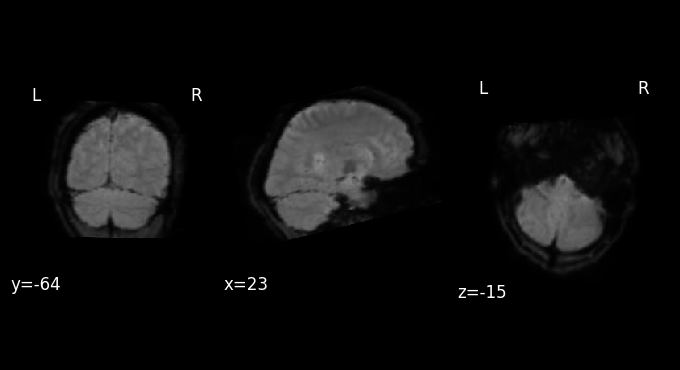

In [4]:
    
sub = 'sub-126BPCP021010'
base = '/home/mina94/scratch/fixSeed_threads/fmriprep-output'
#base = 'fmriprep_ieee_results'
save_filepath='non_mca_fig'

img_timepoint = nib.load('/home/mina94/scratch/fixSeed_threads/fmriprep_mca-output/iter_1/sub-126BPCP021001/ses-1/func/sub-126BPCP021001_ses-1_task-rest_coreg_bold_flirt.nii.gz')
print("Shape of slice: %s" % (img_timepoint.shape,))
plot = nilearn.plotting.plot_anat(img_timepoint, cut_coords=(23,-64,-15),draw_cross=False)


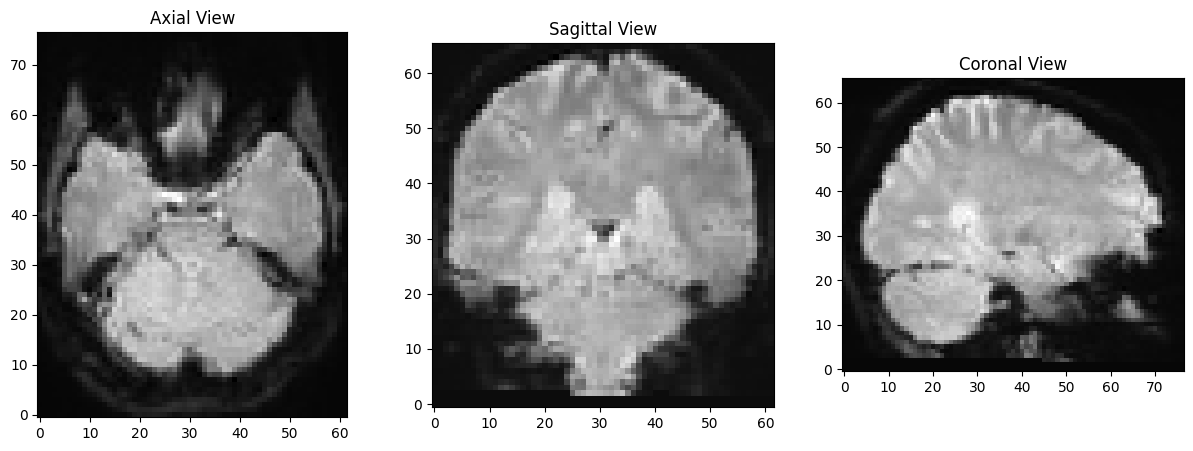

In [29]:

i = 2    
base = '/home/mina94/scratch/fixSeed_threads/fmriprep_ieee-output'
save_filepath='non_mca_fig'

img2 = nib.load(f'{base}/iter_1/{sub}/ses-1/func/{sub}_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')

fmri_data2 = img2.get_fdata()
img2= img2.get_fdata()
# Get the mid-slices for each axis
mid_slice_axial = fmri_data2[:, :, 20, 100]
mid_slice_sagittal = fmri_data2[:, 30, :, 100]
mid_slice_coronal = fmri_data2[20, :, :, 100]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Plot and save the axial view
axes[0].imshow(mid_slice_axial.T, cmap='gray', origin='lower')
axes[0].set_title('Axial View')

# Plot and save the sagittal view
axes[1].imshow(mid_slice_sagittal.T, cmap='gray', origin='lower')
axes[1].set_title('Sagittal View')

 # Plot and save the coronal view
axes[2].imshow(mid_slice_coronal.T, cmap='gray', origin='lower')
axes[2].set_title('Coronal View')

# Save the figure
plt.savefig(f'{save_filepath}/{sub}/{i}_views.png')

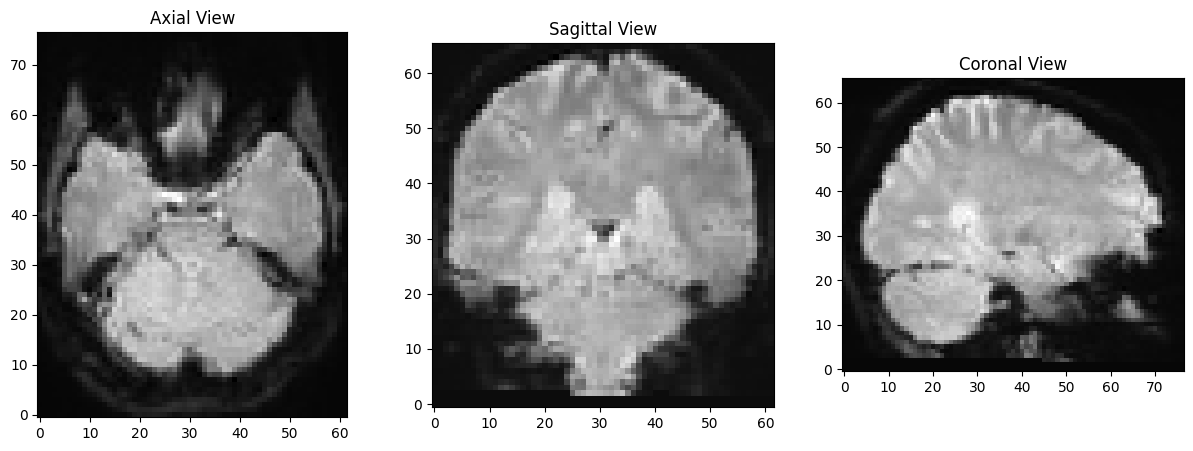

In [30]:

i = 3    
base = '/home/mina94/scratch/fixSeed_threads/fmriprep_ieee-output'
save_filepath='non_mca_fig'

img3 = nib.load(f'{base}/iter_2/{sub}/ses-1/func/{sub}_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')

fmri_data3 = img3.get_fdata()
img3=img3.get_fdata()
# Get the mid-slices for each axis
mid_slice_axial = fmri_data3[:, :, 20, 100]
mid_slice_sagittal = fmri_data3[:, 30, :, 100]
mid_slice_coronal = fmri_data3[20, :, :, 100]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Plot and save the axial view
axes[0].imshow(mid_slice_axial.T, cmap='gray', origin='lower')
axes[0].set_title('Axial View')

# Plot and save the sagittal view
axes[1].imshow(mid_slice_sagittal.T, cmap='gray', origin='lower')
axes[1].set_title('Sagittal View')

 # Plot and save the coronal view
axes[2].imshow(mid_slice_coronal.T, cmap='gray', origin='lower')
axes[2].set_title('Coronal View')

# Save the figure
plt.savefig(f'{save_filepath}/{sub}/{i}_views.png')

In [31]:

frames = [Image.open(f'{save_filepath}/{sub}/{image}') for image in os.listdir(f'{save_filepath}/{sub}')]
frame_one = frames[0]

frame_one.save(f"{save_filepath}/gifs_{sub}.gif", format="GIF", append_images=frames,save_all=True, duration=200, loop=0)


In [32]:
# Check if the matrices are equivalent
if np.array_equal(img1, img3):
    print("The matrices are equivalent.")
else:
    print("The matrices are not equivalent.")

The matrices are equivalent.


In [19]:


def make_gifs(base, save_filepath,timepoint):
    sub='sub-126BPCP021001'
    #print(subs)
    #for sub in subs:
    if os.path.isdir(f'{save_filepath}/views/{sub}'): print('already exists')
    else: 
        os.makedirs(f'{save_filepath}/views/{sub}', exist_ok=True)
        print('make a directory')
    for i in tqdm.tqdm(range(1,11)):
        try:
            img = nib.load(f'{base}/iter_{i}/{sub}/ses-1/func/{sub}_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
            mid_slice_x_fmri = img.get_fdata()[:,:, 20, timepoint]  
            axes = plt.imshow(mid_slice_x_fmri.T, cmap='gray', origin='lower')
            plt.savefig(f'{save_filepath}/gifs_mcflirt/{sub}/{i}.png')
        except Exception as e:
            print(e)
            continue
        # plotting.plot_anat(img, cut_coords=(0,0,0), title=f'{i}', dim=-0.5, output_file=f'{save_filepath}/gifs_mcflirt/{sub}/{i}.png')
    frames = [Image.open(f'{save_filepath}/gifs_mcflirt/{sub}/{image}') for image in os.listdir(f'{save_filepath}/gifs_mcflirt/{sub}')]
    frame_one = frames[0]

    frame_one.save(f"{save_filepath}/gifs_mc_flirt_{sub}.gif", format="GIF", append_images=frames,save_all=True, duration=200, loop=0)
        

already exists


100%|██████████| 10/10 [03:19<00:00, 19.93s/it]


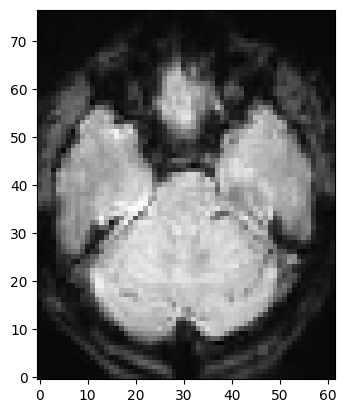

In [20]:
make_gifs('/home/mina94/scratch/fixSeed_results/fmriprep_mca-output' , 'mca_gifs' , 100)


In [ ]:
def make_gifs_oasis(base, save_filepath):

    dir = os.listdir(f'{base}')[0]
    subs = [x.split('.')[0] for x in os.listdir(f'{base}/{dir}') if 'nii.gz.1.nii.gz' in x]

    # print(subs)
    for sub in subs:
        print(sub)
        # files = glob.glob(f"/home/ine5/projects/rrg-glatard/brainhack-2023-linear-registration/results/mca/*/{sub}.nii.gz")
        if os.path.isdir(f'{save_filepath}/gifs/{sub}'): print('already exists')
        else: os.mkdir(f'{save_filepath}/gifs/{sub}')
        for i in os.listdir(f'{base}'):
            try:
                img = nib.load(f'{base}/{i}/{sub}.nii.gz.1.nii.gz')
            except: continue
            plotting.plot_anat(img, cut_coords=(0,0,0), title=f'{i}', dim=-0.5, output_file=f'{save_filepath}/gifs/{sub}/{i}.png')
        frames = [Image.open(f'{save_filepath}/gifs/{sub}/{image}') for image in os.listdir(f'{save_filepath}/gifs/{sub}')]
        frame_one = frames[0]
        
        frame_one.save(f"{save_filepath}/gifs_{sub}.gif", format="GIF", append_images=frames,save_all=True, duration=200, loop=0)
        # break
        

In [ ]:
def make_gifs(base, save_filepath,timepoint):
    sub='sub-126BPCP021001'
    #print(subs)
    #for sub in subs:
    if os.path.isdir(f'{save_filepath}/gifs_try/{sub}'): print('already exists')
    else: 
        os.makedirs(f'{save_filepath}/gifs_try/{sub}', exist_ok=True)
        print('make a directory')
    for i in tqdm.tqdm(range(1,11)):
        try:
            img = nib.load(f'{base}/iter_{i}/{sub}/ses-1/func/{sub}_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
            mid_slice_x_fmri = img.get_fdata()[:,:, 20, timepoint]  
            axes = plt.imshow(mid_slice_x_fmri.T, cmap='gray', origin='lower')
            plt.savefig(f'{save_filepath}/gifs_mcflirt/{sub}/{i}.png')
        except Exception as e:
            print(e)
            continue
        # plotting.plot_anat(img, cut_coords=(0,0,0), title=f'{i}', dim=-0.5, output_file=f'{save_filepath}/gifs_mcflirt/{sub}/{i}.png')
    frames = [Image.open(f'{save_filepath}/gifs_mcflirt/{sub}/{image}') for image in os.listdir(f'{save_filepath}/gifs_mcflirt/{sub}')]
    frame_one = frames[0]

    frame_one.save(f"{save_filepath}/gifs_mc_flirt_{sub}.gif", format="GIF", append_images=frames,save_all=True, duration=200, loop=0)
        